<a href="https://colab.research.google.com/github/nimrashaheen001/Programming_for_AI/blob/main/CNN_SVM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 4861 images belonging to 2 classes.
Found 1603 images belonging to 2 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │         186,626 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 206,882 (808.13 KB)

 Trainable params: 206,882 (808.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


152/152 ━━━━━━━━━━━━━━━━━━━━ 1222s 8s/step - accuracy: 0.5148 - loss: 1.2961 - val_accuracy: 0.6937 - val_loss: 1.2514
Epoch 2/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 738s 5s/step - accuracy: 0.5764 - loss: 1.2481 - val_accuracy: 0.6157 - val_loss: 1.2068
Epoch 3/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 727s 5s/step - accuracy: 0.6256 - loss: 1.2023 - val_accuracy: 0.6868 - val_loss: 1.1542
Epoch 4/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 727s 5s/step - accuracy: 0.6486 - loss: 1.1726 - val_accuracy: 0.6837 - val_loss: 1.1386
Epoch 5/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 739s 5s/step - accuracy: 0.6459 - loss: 1.1642 - val_accuracy: 0.6850 - val_loss: 1.1366
Epoch 6/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 761s 5s/step - accuracy: 0.6517 - loss: 1.1526 - val_accuracy: 0.6800 - val_loss: 1.1275
Epoch 7/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 744s 5s/step - accuracy: 0.6561 - loss: 1.1406 - val_accuracy: 0.5920 - val_loss: 1.2150
Epoch 8/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 752s 5s/step - accuracy: 0.6516 - loss: 1.1563 - val_accuracy: 0.69

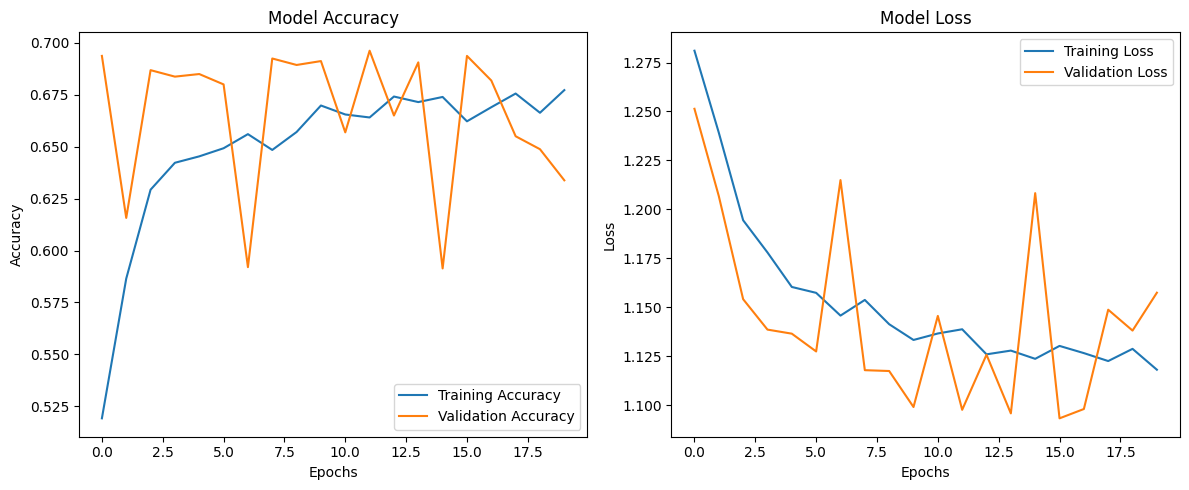

51/51 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step


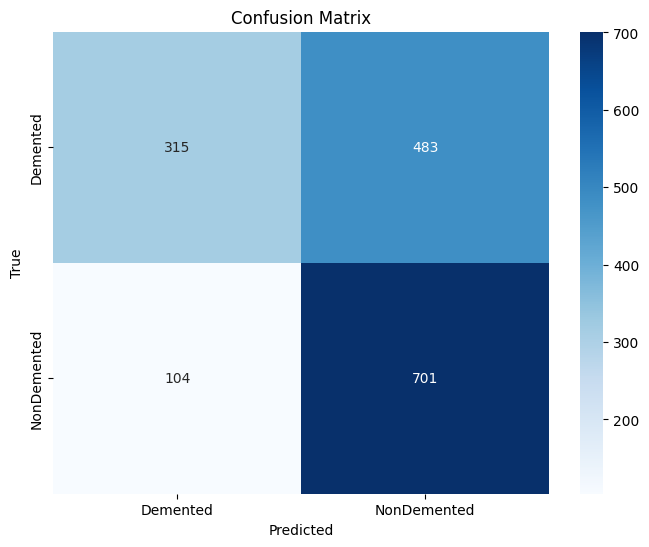


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.39      0.52       798
           1       0.59      0.87      0.70       805

    accuracy                           0.63      1603
   macro avg       0.67      0.63      0.61      1603
weighted avg       0.67      0.63      0.61      1603


Final Training Accuracy: 0.6772
Final Validation Accuracy: 0.6338


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Mount Google Drive for dataset access
from google.colab import drive
drive.mount('/content/drive')

# Define dataset paths
dataset_path = '/content/drive/MyDrive/archive1'
train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')

# Image dimensions and batch size
image_size = (224, 224)
batch_size = 32

# Data augmentation setup
train_data_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data preprocessing for training
train_generator = train_data_gen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use categorical for one-hot encoding
    color_mode='rgb',
    shuffle=True
)

# Preprocessing for testing
test_data_gen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_data_gen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use categorical for one-hot encoding
    color_mode='rgb',
    shuffle=False
)

# Define CNN-SVM model
model = Sequential([
    # Input Layer
    Input(shape=(224, 224, 3)),

    # First Convolutional Layer
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='valid'),
    MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Layer
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='valid'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flattening Layer
    Flatten(),

    # SVM as Output Layer with L2 Regularization
    Dense(2, activation='softmax', kernel_regularizer=l2(0.01))
])

# Compile the model using squared hinge loss and Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='squared_hinge',  # For SVM
    metrics=['accuracy']
)

# Model Summary
model.summary()

# Train the model for 20 epochs
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    verbose=1
)

# Save the trained model
model.save('/content/drive/MyDrive/cnn_svm_model_with_augmentation_20epochs.h5')

# Visualize Training Results
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes))

# Final Accuracy
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"\nFinal Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")
